# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

In [ ]:
#Check the actual image

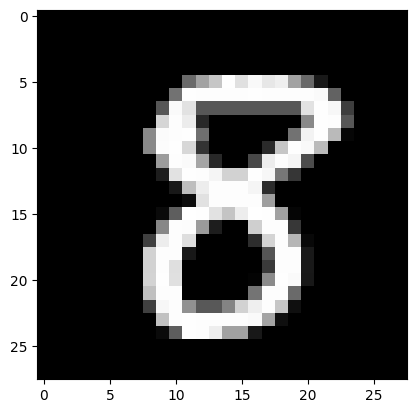

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.5210 - accuracy: 0.8426 - val_loss: 0.2133 - val_accuracy: 0.9385
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2534 - accuracy: 0.9258 - val_loss: 0.1528 - val_accuracy: 0.9534
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2038 - accuracy: 0.9402 - val_loss: 0.1258 - val_accuracy: 0.9604
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1731 - accuracy: 0.9493 - val_loss: 0.1320 - val_accuracy: 0.9588
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1572 - accuracy: 0.9542 - val_loss: 0.1107 - val_accuracy: 0.9677
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1426 - accuracy: 0.9572 - val_loss: 0.1020 - val_accuracy: 0.9688
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1349 - accuracy: 0.9596 - val_loss: 0.0970 - val_accuracy: 0.9721
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09684832394123077
Test accuracy: 0.9768000245094299


Interpret the result <br>


#With a low value of loss and a high value of accuracy, it seems that the model is accurate and precise in classifying handwritten digits.

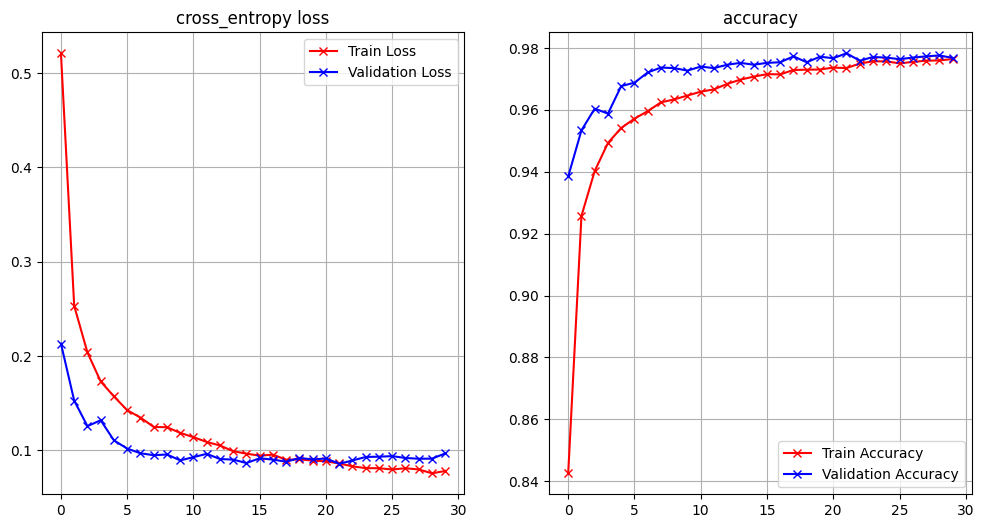

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#While both the train loss and validation loss go downwards, it seems that validation loss flattens itself out at around 0.5 epoch. The graph indicates that there could have been a bit of an overfit in the model. For the accuracy, it seems that both train and validation go upwards continuously and meet at around 20+ epochs. After meeting, it plateaus which could indicate that after a certain epoch, the peak accuracy may have been reached.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
#Model
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequenti

<b>There are definitely more parameters compared to the previous model due to the size being increased from 64 to 400 and 300 respectively.</b>

In [ ]:
#Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_m1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.3282 - accuracy: 0.9002 - val_loss: 0.1373 - val_accuracy: 0.9568
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1525 - accuracy: 0.9545 - val_loss: 0.0887 - val_accuracy: 0.9716
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1147 - accuracy: 0.9654 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0998 - accuracy: 0.9699 - val_loss: 0.0719 - val_accuracy: 0.9782
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.0680 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0788 - accuracy: 0.9769 - val_loss: 0.0695 - val_accuracy: 0.9790
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0798 - val_accuracy: 0.9780

In [ ]:
#New model
from keras.regularizers import l2

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
#Train this model for your preferred epochs , learning rate, batch size and optimizer
from keras.optimizers import Adamax

learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adamax(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 150  # mini-batch with 128 examples
epochs = 25
history_m2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/25
400/400 [==============================] - 9s 20ms/step - loss: 2.7494 - accuracy: 0.8339 - val_loss: 0.9624 - val_accuracy: 0.9139
Epoch 2/25
400/400 [==============================] - 7s 17ms/step - loss: 0.7761 - accuracy: 0.9009 - val_loss: 0.5683 - val_accuracy: 0.9287
Epoch 3/25
400/400 [==============================] - 8s 20ms/step - loss: 0.5935 - accuracy: 0.9129 - val_loss: 0.4922 - val_accuracy: 0.9345
Epoch 4/25
400/400 [==============================] - 7s 18ms/step - loss: 0.5353 - accuracy: 0.9205 - val_loss: 0.4541 - val_accuracy: 0.9415
Epoch 5/25
400/400 [==============================] - 7s 18ms/step - loss: 0.5004 - accuracy: 0.9253 - val_loss: 0.4316 - val_accuracy: 0.9436
Epoch 6/25
400/400 [==============================] - 8s 20ms/step - loss: 0.4734 - accuracy: 0.9303 - val_loss: 0.4093 - val_accuracy: 0.9449
Epoch 7/25
400/400 [==============================] - 7s 17ms/step - loss: 0.4519 - accuracy: 0.9329 - val_loss: 0.3931 - val_accuracy: 0.9480

In [ ]:
def plot_loss_accuracy(history_1, history_2):
    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(2, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Model 1 Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Model 1 Validation Loss")
    ax.legend()
    ax.set_title('Model 1 Cross Entropy Loss')
    ax.grid(True)

    ax = fig.add_subplot(2, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Model 1 Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Model 1 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 1 Accuracy')
    ax.grid(True)

    ax = fig.add_subplot(2, 2, 3)
    ax.plot(history_2.history["loss"],'r-x', label="Model 2 Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Model 2 Validation Loss")
    ax.legend()
    ax.set_title('Model 2 Cross Entropy Loss')
    ax.grid(True)

    ax = fig.add_subplot(2, 2, 4)
    ax.plot(history_2.history["accuracy"],'r-x', label="Model 2 Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Model 2 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 2 Accuracy')
    ax.grid(True)

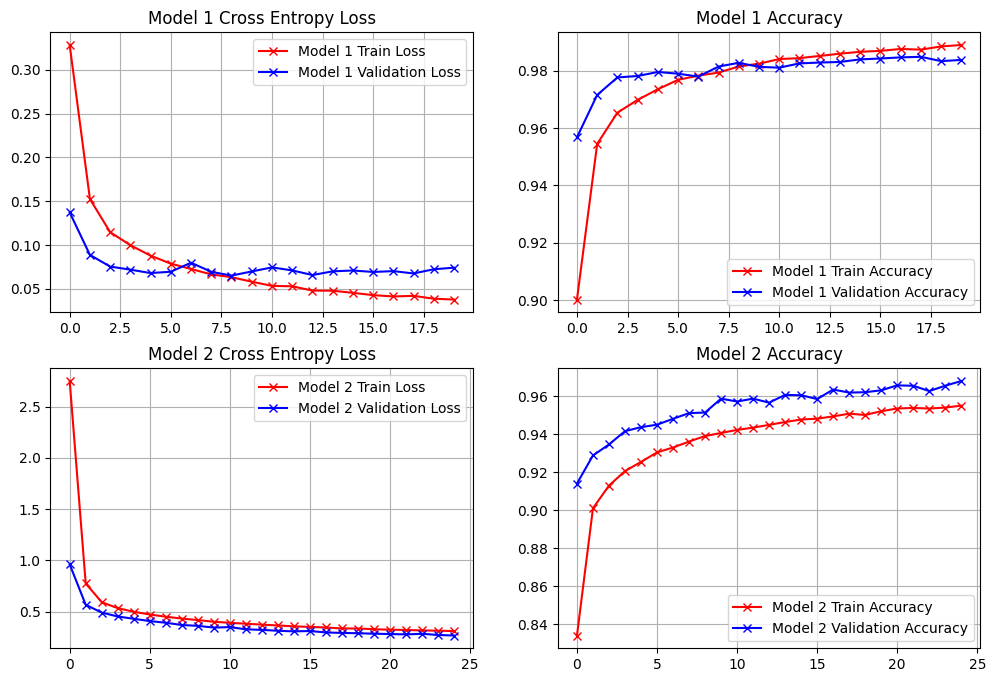

In [ ]:
#Compare the accuracy and loss (training and validation) of model_1 and model_2
plot_loss_accuracy(history_m1, history_m2)

<b>Model 1's validation loss seems to have a bit of fluctuation, while the train loss goes on a continuous downwards trend. For the accuracy of Model 1, the train accuracy goes on continuous upwards trend while the validation accuracy went flat at around 0.98.</b><br><br>
<b>Model 2's loss seems to be better overall and has less overfitting. And Model 2's accuracy seems to both go at a continuous upwards trend.</b>

#### Conclusion

#In this laboratory activity, we learned about regularization and how it is used in neural networks. Regularization is essentially implemented to help complex models avoid overfitting. With the given activity, we can then compare that the Dropout regularization technique seems to be worse compared to the L2 regularization technique. But it is also important to note that these types of changes can happen depending on the use case and what the goal is of the model. All in all, regularization is key in maintaining the accuracy of a neural network.